In [9]:
#Khởi tạo models 

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model

#import cv2  # import openCV
#cv2.__version__

In [10]:
# liên kết driver
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
train_dataset = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

In [12]:
training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/Colab Notebooks/Train_my_face/train',
                        target_size=(150, 150),
                        batch_size=30,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Colab Notebooks/Train_my_face/validation",
                         target_size=(150, 150),
                          batch_size=30,
                         class_mode="categorical")

                        

Found 109 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [13]:
training_generator.class_indices

{'Ronaldo': 0, 'Trong': 1}

In [14]:

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))

#compiling the model..
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
from keras.backend import categorical_crossentropy
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [15]:
history = model.fit(training_generator,batch_size=20,epochs=30,verbose=1,validation_data=validation_generator)


Epoch 1/30
4/4 [==============================] - 4s 595ms/step - loss: 5.6292 - accuracy: 0.4862 - val_loss: 0.9113 - val_accuracy: 0.4375
Epoch 2/30
4/4 [==============================] - 1s 268ms/step - loss: 0.6675 - accuracy: 0.6697 - val_loss: 0.5741 - val_accuracy: 0.5625
Epoch 3/30
4/4 [==============================] - 1s 272ms/step - loss: 0.7722 - accuracy: 0.5505 - val_loss: 0.5941 - val_accuracy: 0.5000
Epoch 4/30
4/4 [==============================] - 1s 267ms/step - loss: 0.5113 - accuracy: 0.7523 - val_loss: 0.3244 - val_accuracy: 0.9375
Epoch 5/30
4/4 [==============================] - 1s 311ms/step - loss: 0.4207 - accuracy: 0.8165 - val_loss: 0.3229 - val_accuracy: 1.0000
Epoch 6/30
4/4 [==============================] - 1s 265ms/step - loss: 0.3894 - accuracy: 0.8440 - val_loss: 0.6386 - val_accuracy: 0.5625
Epoch 7/30
4/4 [==============================] - 1s 274ms/step - loss: 1.2761 - accuracy: 0.6514 - val_loss: 0.5624 - val_accuracy: 0.9375
Epoch 8/30
4/4 [====

In [16]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_face_ID.h5')


In [17]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_face_ID.h5')

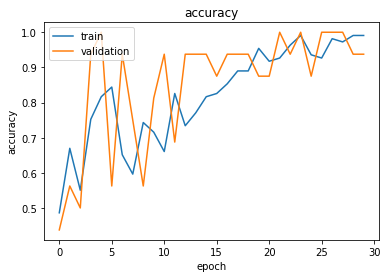

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

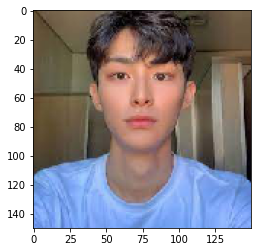

In [36]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('boy.jpeg',target_size=(150,150,3))
plt.imshow(img)

In [37]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
import numpy as np
val=np.argmax(model.predict(img),axis=1)   #vi tri so 46
if val == 1:
    print("Đúng")
else:
    print("Sai")

Sai


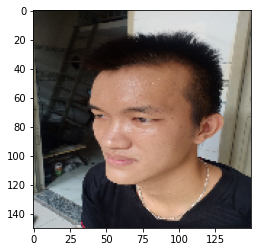

In [43]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('tr.jpg',target_size=(150,150,3))
plt.imshow(img)

In [44]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
import numpy as np
val=np.argmax(model.predict(img),axis=1)   #vi tri so 46
if val == 1:
    print("Đúng")
else:
    print("Sai")

Đúng
